In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(10)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


Scatter plot with matplotlib

Text(0,0.5,'Combined Fuel Eff. (mpg)')

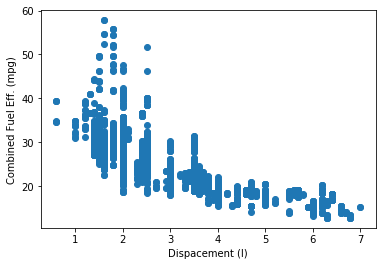

In [6]:
plt.scatter(data= fuel_econ, x= 'displ', y = 'comb');
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Another way to create a scatter plot with a regression line (Seaborn):

Text(0,0.5,'Combined Fuel Eff. (mpg)')

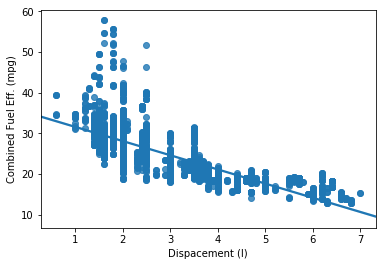

In [8]:
sb.regplot(data= fuel_econ, x= 'displ', y = 'comb', fit_reg = True);
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Overplotting: Transparency and jitter

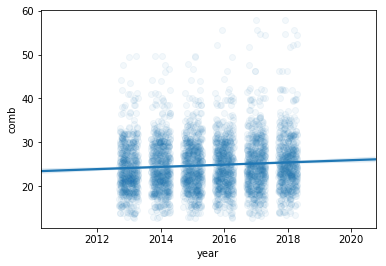

In [11]:
sb.regplot(data= fuel_econ, x= 'year', y= 'comb', x_jitter= 0.3, scatter_kws= {'alpha': 1/20});

Now the first graph with scattering and transparency:

Text(0,0.5,'Combined Fuel Eff. (mpg)')

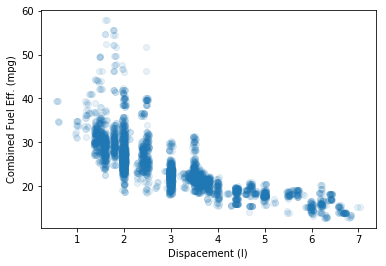

In [13]:
sb.regplot(data= fuel_econ, x= 'displ', y = 'comb', x_jitter= 0.04, scatter_kws={'alpha': 1/10}, fit_reg= False);
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

## Heatmap

Text(0,0.5,'Combined Fuel Eff. (mpg)')

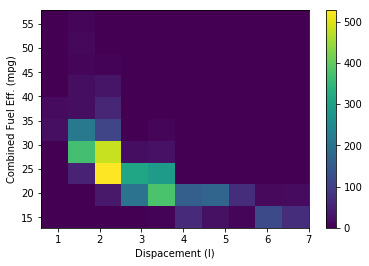

In [14]:
plt.hist2d(data= fuel_econ, x= 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Let's use some more arguments to the hist2d function to improve our heatmap:

1. **cmin** sets the minimum count to colour a bin
2. **cmap** selects the color mappin. Viridis is the default and _r is reversed
3. **bins** lets us specify our bins boundaries

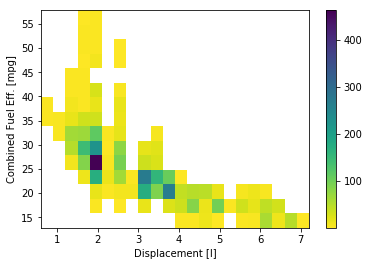

In [25]:
statistics = fuel_econ[['displ', 'comb']].describe()
bins_x = np.arange(statistics['displ']['min'], statistics['displ']['max'] + 0.3, 0.3)
bins_y = np.arange(statistics['comb']['min'], statistics['comb']['max'] + 3, 3)

plt.hist2d(data= fuel_econ, x= 'displ', y= 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins= [bins_x, bins_y]);
plt.colorbar() # Show a color bar to the side of the plot
plt.xlabel('Displacement [l]')
plt.ylabel('Combined Fuel Eff. [mpg]');

## Adding annotations on cells

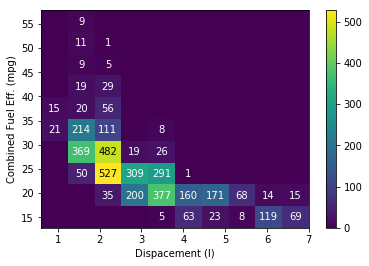

In [42]:
h2d = plt.hist2d(data= fuel_econ, x= 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Dispacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0] 
bins_x = h2d[1]
bins_y = h2d[2]
dist_x = (bins_x[2] - bins_x[1])/2
dist_y = (bins_y[2] - bins_y[1])/2

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 450:
            plt.text(bins_x[i] + dist_x, bins_y[j] + dist_y, int(c),
                     ha= 'center', va= 'center', color= 'black')
        elif c > 0:
            plt.text(bins_x[i] + dist_x, bins_y[j] + dist_y, int(c),
                     ha= 'center', va= 'center', color= 'white')